## Final Project Submission

Please fill out:
* Student name: Calvine Dasilver, Hellen Samuel, Salahudin Salat, Jack otieno and Sandra Kiptum
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Nikita
* Blog post URL:


 #  Demystifying House Sales Analysis with Regression Modeling in a Northwestern County

 ## Project Overview

   ## **Business Understanding**

The real estate market plays a crucial role in the economic health and stability of a region. Understanding the factors that influence house prices is essential for both buyers and sellers to navigate the market effectively. This project focuses on a specific northwestern county in the United States, aiming to shed light on the key determinants of property valuation in this area.
### Problem Statements:
What are the most significant factors influencing house prices in this northwestern county?How can we quantify the relationship between these factors and property value?Can we develop a reliable model to predict house prices based on relevant characteristics?
### Challenges:
* Real estate data can be complex and multifaceted, encompassing various property features and local market trends.
* Accurately identifying and quantifying the relative impact of each factor on house prices can be challenging.
* External factors like economic conditions and interest rates might also influence prices, requiring careful consideration.

### Proposed Solutions:
We propose utilizing multiple linear regression, a powerful machine learning technique. This method allows us to analyze a large dataset of house sales and identify the statistical relationships between various property features (e.g., square footage, number of bedrooms, location) and the corresponding sale prices.
### Objectives:
1. Develop a robust multiple linear regression model that accurately predicts house prices in the chosen northwestern county.
2. Identify the most significant factors influencing property value within this specific market.
3. Provide valuable insights into the housing market dynamics of the region, benefiting potential buyers, real estate agents, and other stakeholders.
   
 
**Research questions that would help to achieve the objectives**:

1. How does the number of bedrooms, bathrooms, grade and square footage of a house correlate with its sale price in King County?
2. How much can a homeowner expect the value of their home to increase after a specific renovation project?
3. Which renovation projects have the most significant impact on a home's market value in the northwestern county?
4. Are there specific combinations of renovation projects that provide an interdependent effect on a home's market value?

## **Data Understanding**

Our analysis leverages the King County House Sales dataset - a rich resource containing over 21,500 records and 20 distinct features(columns). Spanning house sales from May 2014 to May 2015, this dataset provides a comprehensive snapshot of the King County housing market during that period.

**The King County House Sales dataset contains the following columns;**

id - unique identified for a house

date - Date house was sold 

Price - Sale price (prediction target)

bedrooms - Number of bedrooms,

bathrooms - Number of bathrooms,

sqft_living - Square footage of living space in the home,

sqft_lot - Square footage of the lot,

floors - Number of floors (levels) in house,

view - Quality of view from house,

condition - How good the overall condition of the house is. Related to maintenance of house,

grade - Overall grade of the house. Related to the construction and design of the house,

sqft_above - Square footage of house apart from basement,

sqft_basement - Square footage of the basement,

yr_built - Year when house was built,

yr_renovated - Year when house was renovated,

zipcode - ZIP Code used by the United States Postal Service,

sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors,

sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors, and

sell_yr - Date house was sold.


We need to be aware of certain constraints within the data, as these might influence our analysis and interpretation of the results. From the sources;

1. The data may contain anomalies or inconsistencies that require careful examination during analysis. For instance, a record lists a house with 33 bedrooms, which appears to be an outlier

2. It's important to consider the time frame of the data (May 2014 - May 2015) as it may not fully capture the current market dynamics in King County.
3. It's important to acknowledge the scope of the data. While it provides details on house features, it may not capture external factors such as interest rates or the overall economic climate, which can also play a role in determining property values.

## **Data Preparation**

In [24]:
import csv
import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import OLS
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder

In [25]:
df = pd.read_csv("data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [26]:
#checking what columns we have
def columns(data):
     return data.columns

columns(df)


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [27]:
#checking on data data types and null values
def info(data):
     return data.info()
info(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [28]:
# checking the number of rows and columns
def shape(data):
     return data.shape

shape(df)


(21597, 21)

In [29]:
#checking null values
def null(data):
    return data.isna().sum()
null(df)

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [30]:
# Deleting columns with null values
def drop_columns(data,columns):
    """
    takes in a data frame and drop specified columns
    """
    return(data.drop(columns, axis = 1, inplace = True ))


In [31]:
drop_columns(df, "yr_renovated")

In [32]:
df.dropna(subset=['view'], inplace=True)
df.dropna(subset =['waterfront'], inplace=True)

In [33]:
# checking for non-numeric columns
def count_null(data):
    """
    Counts the aggregate sum of all null values in the data frame
    """
    return data.isnull().sum()

count_null(df)

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [34]:
def drop_duplicates(df, subset=None):
    """
    Drops duplicates from a pandas DataFrame based on a subset of columns and returns the new data frame

   it takes in the df and the subset eg subset = "id"
    """
    return df.drop_duplicates(subset=subset, keep = "first", inplace = True)

In [35]:
# drop the duplicates
df.drop_duplicates(subset='id', inplace=True)

In [36]:
#statistical summary
def describe(data):
     return data.describe()
describe(df)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.903000e+04,1.903000e+04,19030.000000,19030.000000,19030.000000,1.903000e+04,19030.000000,19030.000000,19030.000000,19030.000000,19030.000000,19030.000000,19030.000000,19030.000000
mean,4.593750e+09,5.417572e+05,3.375355,2.119154,2084.463058,1.508839e+04,1.496847,1793.565791,1971.113190,98077.657646,47.560114,-122.213797,1988.788650,12817.168208
std,2.876278e+09,3.713525e+05,0.928520,0.769075,922.418436,4.087882e+04,0.540581,832.513113,29.405592,53.407946,0.138700,0.140828,684.988741,27633.190102
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.125049e+09,3.225000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1200.000000,1952.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,3.905081e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.615500e+03,1.500000,1570.000000,1975.000000,98065.000000,47.572300,-122.230000,1840.000000,7620.000000
75%,7.334501e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.072000e+04,2.000000,2220.000000,1997.000000,98117.000000,47.678100,-122.124000,2360.000000,10095.750000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


statistical summary observation count for each column is 19,164 this shows that we dont have missing values. The mean value of the house price is USD 5.414490e+05 while the minimum house price is USD 7.800000e+04 and maximum house price is USD 7.700000e+06 The standard deviation of the house price stands at USD 3.709009e+05

In [37]:
#converting date to datetime format
df['date']=pd.to_datetime(df['date'])
#extracting year from date column
df.date=df['date'].dt.year
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
5,7237550310,2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930


In [38]:
# Creating a new column for sell year
df['sell_yr'] = pd.to_datetime(df['date'],format='%Y').dt.year
df.drop(columns='date', inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sell_yr
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,2015
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930,2014


In [39]:
#creating column house age at year of sale
df['house_age']=df['sell_yr']-df['yr_built']
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sell_yr,house_age
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,...,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,...,770,0.0,1933,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,...,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,...,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,2015,28
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,...,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930,2014,13


In [40]:
#transformation of categorical values 'condition' column
df['condition'].replace(to_replace=['Poor', 'Fair', 'Average', 'Good', 'Very Good'], value=[1, 2, 3, 4, 5], inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sell_yr,house_age
1,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,3,...,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,2014,63
2,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,3,...,770,0.0,1933,98028,47.7379,-122.233,2720,8062,2015,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,5,...,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,2014,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,3,...,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,2015,28
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,3,...,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930,2014,13


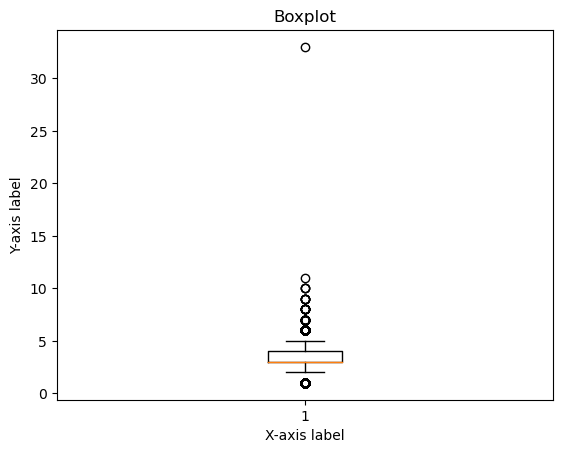

In [41]:
# checking for outliers
def remove_outliers_zscore(df):
    """
    takes in a dataframe and removes outliers from a dataframe using Z-score method.
    
    """
    import numpy as np
    # Calculate Z-scores
    z_scores = np.abs((df - df.mean()) / df.std())
    
    # Identify outliers
    outliers_z = df[(z_scores > 3).any(axis=1)]
    
    # Remove outliers from dataframe
    df_cleaned = df.drop(outliers_z.index)
    return df_cleaned
# Creating a boxplot
plt.boxplot(df["bedrooms"])

# Adding labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Boxplot')

# Display the plot
plt.show()


According to the above visualization, the bedroom data has an outlier of 33.So we are going to delete rows where 'bedrooms' column has value 33

In [42]:
# Delete rows where 'bedrooms' column has value 33
df = df[df['bedrooms'] != 33]

# Reset index if needed
df.reset_index(drop=True, inplace=True)

### **Exploratory Data Analysis**

In this section, we will perform exploratory data analysis (EDA) to understand the data better and discover any patterns, trends using univariate,bivariate and multivariate analysis

We will use descriptive statistics and visualizations to summarize the main characteristics of the data and examine the relationships between the features and the target variable.

We will also check the distribution and correlation of the variables and identify any potential problems or opportunities for the analysis.

Univariate Analysis

Univariate analysis involves the examination of single variables.We focus in the summary statistics of target variable-price to help us undersatand the distribution and skewness of house prices

Basic Statistics of Price:
 count    1.902900e+04
mean     5.417520e+05
std      3.713615e+05
min      7.800000e+04
25%      3.225000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


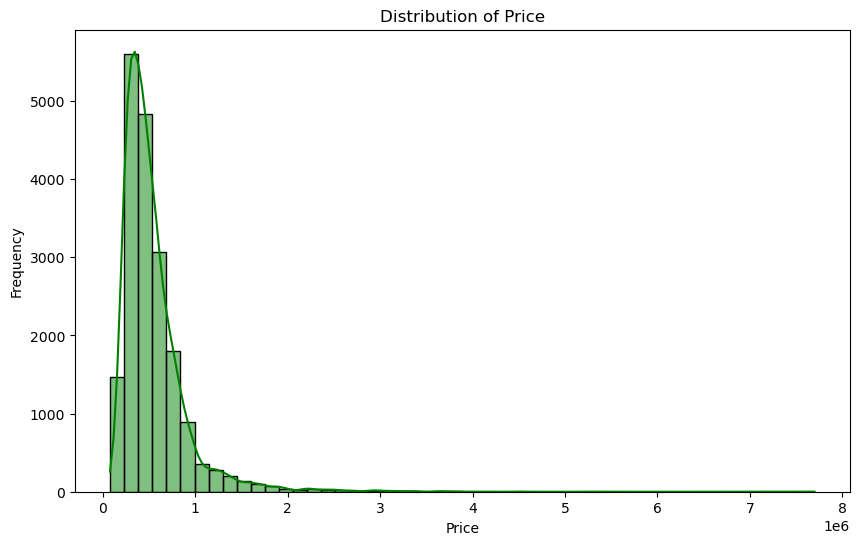

In [43]:
# Display summary statistics of the 'price' variable
price_stats = df['price'].describe()
print("Basic Statistics of Price:\n", price_stats)

# Visualizing the distribution of 'price' using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='green')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The histogram shows that the distribution of house price is positively skewed suggesting that while most houses are concentrated around lower prices, there are some properties with significantly higher prices.

Bivariate Analysis

In this section, we will perform bivariate analysis to examine the relationship between the target variable - price and the other numeric and continuous features in the data. We will use scatter plots to show the direction, strength, and shape of the relationship between two numeric variables. This will help us understand how one variable affects or is affected by another variable and identify any patterns or trends that may exist.

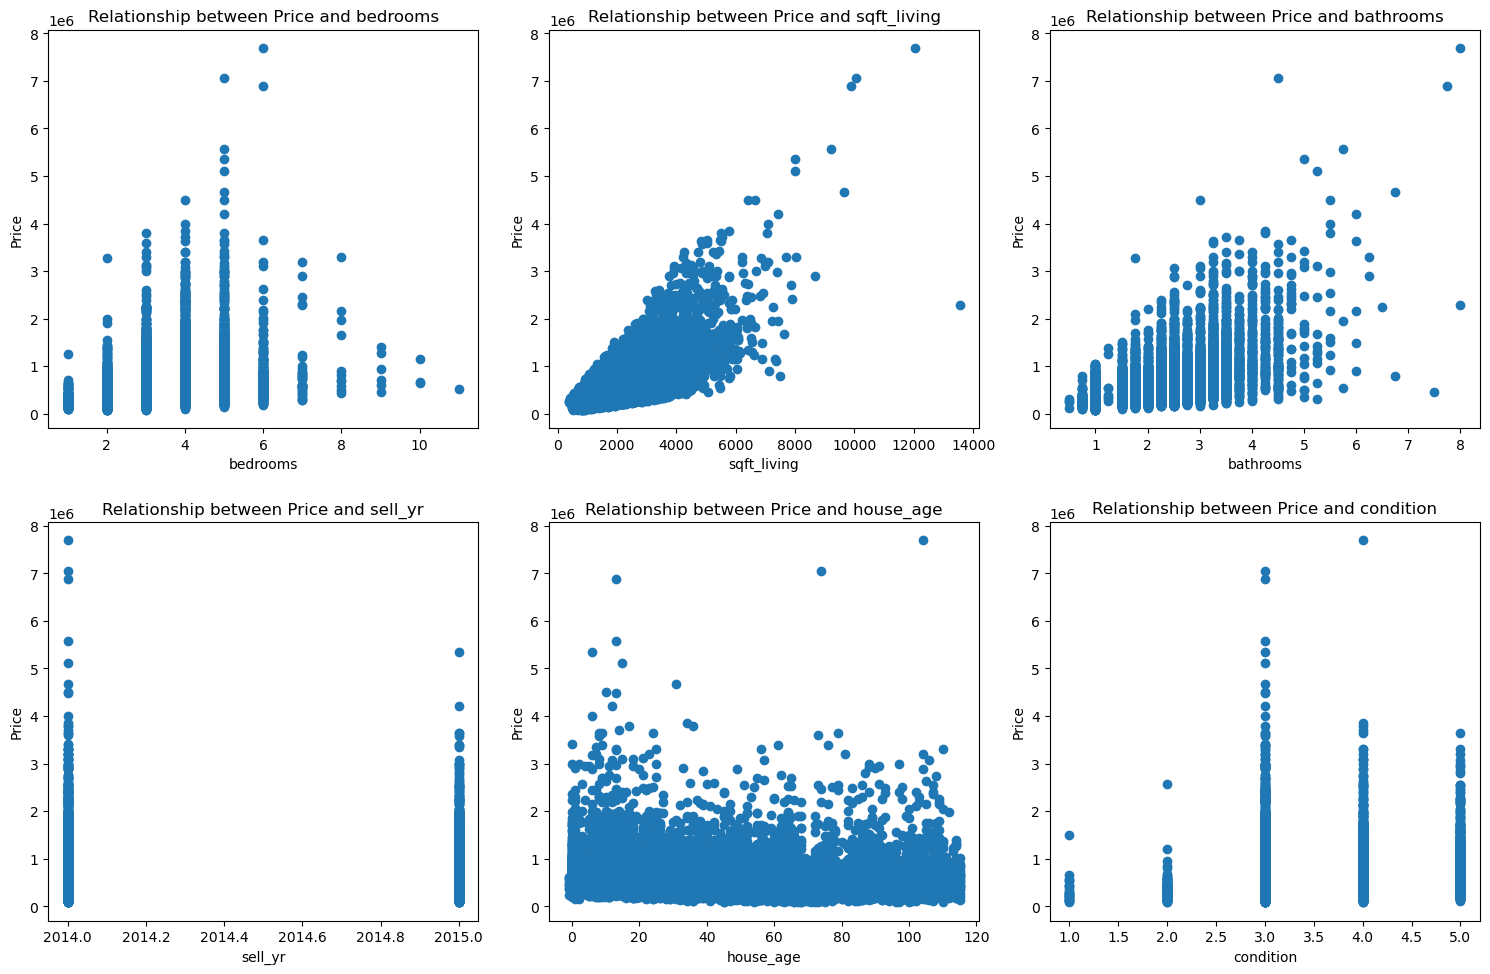

In [44]:
#relationships between our target variable and other independent variables in the dataset
import math
variables = ['bedrooms','sqft_living','bathrooms','sell_yr','house_age','condition']
num_rows = math.ceil(len(variables) / 3)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(df[var],df['price'])
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Price')
    axes[row, col].set_title(f'Relationship between Price and {var}')

plt.tight_layout()
plt.show()

The scatter plots show that there is a positive relationship between most of the independent variables and the price of a house. This means that houses with higher values for these variables tend to be more expensive

Multivariate Analysis

In this section, we will perform multivariate analysis to examine the relationship between the target variable - price and multiple features in the data. We will use heatmap to visualize the correlation matrix of the features and see how they are related to each other and to the price.

A heatmap can show us the strength and direction of the correlation between two variables using different colors and shades. This will help us identify the most important features for the prediction and avoid multicollinearity problems.

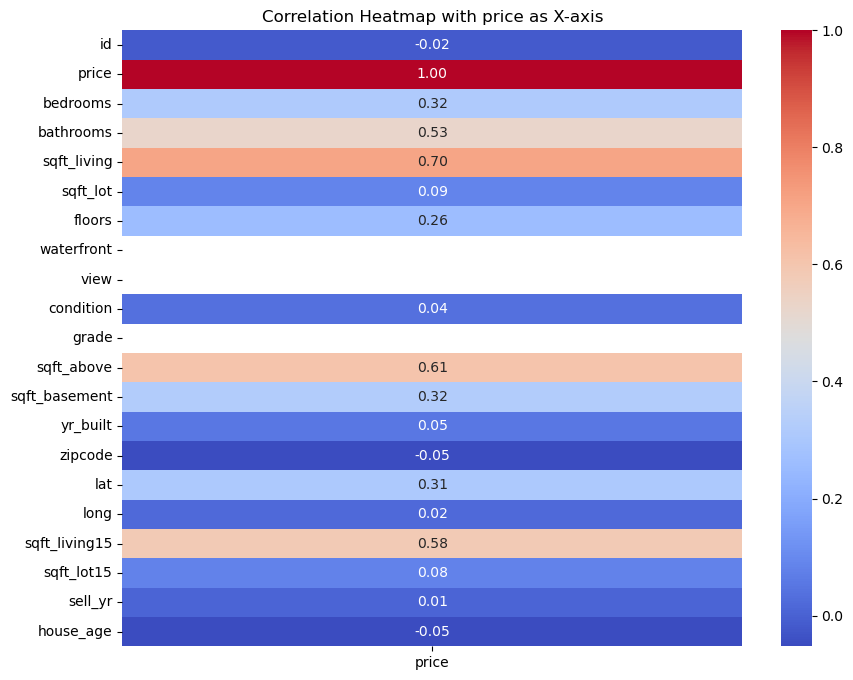

In [45]:
import numpy as np

# Replace non-numeric values with NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Create a correlation matrix
corr_matrix = df_numeric.corr()

# Select only 'sale_value' as x-axis
corr_sale_value = corr_matrix[['price']]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_sale_value, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Heatmap with price as X-axis')
plt.show()


Positive correlations are typically represented by shades of red, and negative correlations by shades of blue.
We note that bathrooms and sqft_living are highly positively correlated.

RECCOMENDATIONS

From the three types of analysis performed I reccomend the following;
1.Under univariate analysis,consider the house prices since most of the prices are relatively low.
2.Under bivariate analysis,most independent variables such as sell year, house age, bathrooms and bedrooms influence the house price.
3.Under multivariate analysis,bathrooms and square foot living are the most independent variables that affect the house price.

## **Regression Modelling** <br>
### Simple Linear Regression

when doing linear regresssion, the data to be used has to comply with LINE method;
<li>L - Linearity(Relationship between x and y should be linear)
<li>I - Independence(the observations and errors are independent of each other)
<li>N - Normality(the residuals are normarly distribute)
<li>E - Equal variance(the variance of the residuals across all level of idependent variables)

For simple linear regression we will use the one column that has the strongest correlation to the price. this will also be or baseline model for the multiple linear regression 

In [46]:
# checking for correlation
df.corr()['price'].sort_values(ascending=False).head(15)

ValueError: could not convert string to float: 'NO'

from the correlation sqft_living has the highest correlatio with price, we will therefore use sqft_living as the exogenous variable and price as our endogenous variable

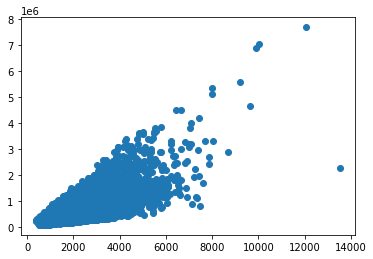

In [ ]:
plt.scatter(df["sqft_living"], df["price"])

from this we can see that there is a linearity between the two variables satisfying one of the 4 LINE specifications. we will check for the others in our model summary

#### Building our model


In [ ]:
# importing neccessary modules
import statsmodels.api as sm
import my_functions

# defining our independent and dependant variables 
X = df[["sqft_living"]]
y = df["price"]


#building our model
model = building_model("y ~ X", df)

# fitting the model to our data
simple_results = model.fit()
simple_results

In [ ]:
# checking our model summary
print(simple_results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.887e+04
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:49:21   Log-Likelihood:            -2.6636e+05
No. Observations:               19163   AIC:                         5.327e+05
Df Residuals:                   19161   BIC:                         5.327e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.863e+04   4697.231    -10.353      0.0

##### Interprating our models results

<li> form the prob(fstatistic) we can tell that our model is statistically significant as the p_value is well below our alpha(0.05)
<li> from our R-Squared(49.3%) it shows that our model explain about 49.3% of variance in price 
<li> our intercept has a p_value less than our alpha(5%) thus it is statistically significant, from this we can say that if the square square   footage of the living room in the home is zero the price will be about -44000 USD, which doesn't really make sense but it is useful for our modeL
<li> our slope coefficient is  280.8688  showing that an increase of 1 square foot living is associated with an increase of about  280.8688 USD in price
<li>we are 95% confident that the intercept lies between -5.27e+04 and -3.54e+04
<li> we are also 95% confident that our slope is within the range 277.067 and 284.670


<li>Durbin-Watson: A test for autocorrelation in the residuals. Values between 0 and 2 suggest positive autocorrelation, between 2 and 4 suggest negative autocorrelation, and around 2 suggest no autocorrelation.<br>
this shows no autocorrelation in our errors satisfying the second condition of the LINE requirments<br>

<li> Omnibus test: shows a normality of residuals. A low p-value (< 0.05) indicates that the residuals are not normally distributed.
<li>Jarque-Bera (JB): Another test for normality of residuals. A low p-value (< 0.05) indicates that the residuals are not normally distributed.<br>

from the  Omnibus test and Jarque-Bera (JB) we can see that our residuals are not normally distributed which shows weakness in our model. Considering other independent variables may improve this 
 


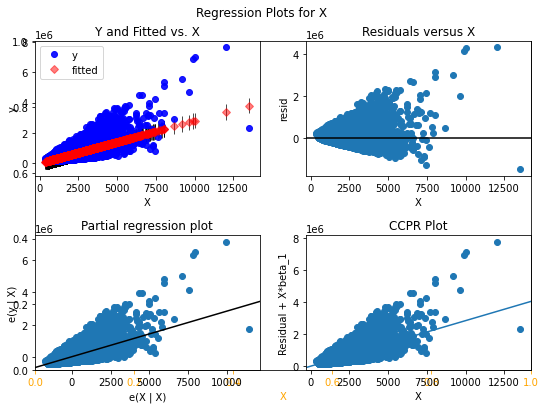

In [ ]:
def plotting_regression_plots(your_model, independent_variable):
    """
    Plots all necessary regression plots
    """
    fig, ax = plt.subplots(figsize=(8, 6))  # Create a figure and axis
    sm.graphics.plot_regress_exog(your_model, independent_variable, fig=fig)  # Plot regression plots on the axis
    ax.set_xlabel(independent_variable, color='orange')  # Set x-axis label color to orange
    ax.tick_params(axis='x', colors='orange')  # Set x-axis tick color to orange

plotting_regression_plots(simple_results,"X")
plt.show()

we are plotting our residuals to understand where our model is perfoming best and where it is performing poorly

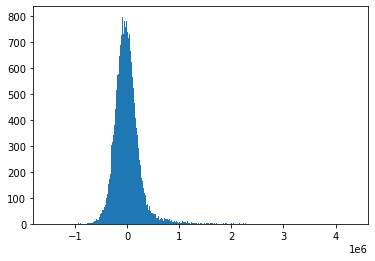

In [ ]:
plt.hist(simple_results.resid, bins = "auto")
plt.show()

our graphs give us the same information as our summary did <br>
from this we can see that our residuals are not normally distributed we can solve this but using multiple linear distribution

### Multiple Linear Regression

In [ ]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sell_yr,house_age
0,6414100192,538000.0,3,2.25,2570,7242,2.0,NO,NONE,3,...,2170,400.0,1951,98125,47.7210,-122.319,1690,7639,2014,63
1,5631500400,180000.0,2,1.00,770,10000,1.0,NO,NONE,3,...,770,0.0,1933,98028,47.7379,-122.233,2720,8062,2015,82
2,2487200875,604000.0,4,3.00,1960,5000,1.0,NO,NONE,5,...,1050,910.0,1965,98136,47.5208,-122.393,1360,5000,2014,49
3,1954400510,510000.0,3,2.00,1680,8080,1.0,NO,NONE,3,...,1680,0.0,1987,98074,47.6168,-122.045,1800,7503,2015,28
4,7237550310,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,3,...,3890,1530.0,2001,98053,47.6561,-122.005,4760,101930,2014,13


For Multiple Linear Regression, we are going to use more than one predictor variable to predict price for our case <br>

Our baseline for this model will  be the linear Regression that we just did above

#### Cleaning Data


In [ ]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'sell_yr', 'house_age'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19163 entries, 0 to 19162
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19163 non-null  int64  
 1   price          19163 non-null  float64
 2   bedrooms       19163 non-null  int64  
 3   bathrooms      19163 non-null  float64
 4   sqft_living    19163 non-null  int64  
 5   sqft_lot       19163 non-null  int64  
 6   floors         19163 non-null  float64
 7   waterfront     19163 non-null  object 
 8   view           19163 non-null  object 
 9   condition      19163 non-null  int64  
 10  grade          19163 non-null  object 
 11  sqft_above     19163 non-null  int64  
 12  sqft_basement  19163 non-null  object 
 13  yr_built       19163 non-null  int64  
 14  zipcode        19163 non-null  int64  
 15  lat            19163 non-null  float64
 16  long           19163 non-null  float64
 17  sqft_living15  19163 non-null  int64  
 18  sqft_l

In [ ]:
#waterfront has NaN values that need to be cleaned
df['waterfront'].fillna('NO', inplace=True)
df.head()

#convert basement into int and remove ?
df['sqft_basement'] = df['sqft_basement'].apply(lambda x: 0 if x=='?' else int(x.split('.')[0]))
# Change waterfront to numeric
df['waterfront'] = df['waterfront'].apply(lambda x: 1 if x=='YES' else 0)
# Change view to numeric
df['view'] = df['view'].apply(lambda x: 0 if x=='NONE' else (1 if x=='FAIR' else (2 if x=='AVERAGE' else (3 if x=='GOOD' else 4))))
 # Convert grade to int
df['grade'] = df['grade'].apply(lambda x: x[:2] if x[0]=='1' else x[:1]).astype('int64')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19163 entries, 0 to 19162
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19163 non-null  int64  
 1   price          19163 non-null  float64
 2   bedrooms       19163 non-null  int64  
 3   bathrooms      19163 non-null  float64
 4   sqft_living    19163 non-null  int64  
 5   sqft_lot       19163 non-null  int64  
 6   floors         19163 non-null  float64
 7   waterfront     19163 non-null  int64  
 8   view           19163 non-null  int64  
 9   condition      19163 non-null  int64  
 10  grade          19163 non-null  int64  
 11  sqft_above     19163 non-null  int64  
 12  sqft_basement  19163 non-null  int64  
 13  yr_built       19163 non-null  int64  
 14  zipcode        19163 non-null  int64  
 15  lat            19163 non-null  float64
 16  long           19163 non-null  float64
 17  sqft_living15  19163 non-null  int64  
 18  sqft_l

from this summary we can conclude that our data is set for modeling 

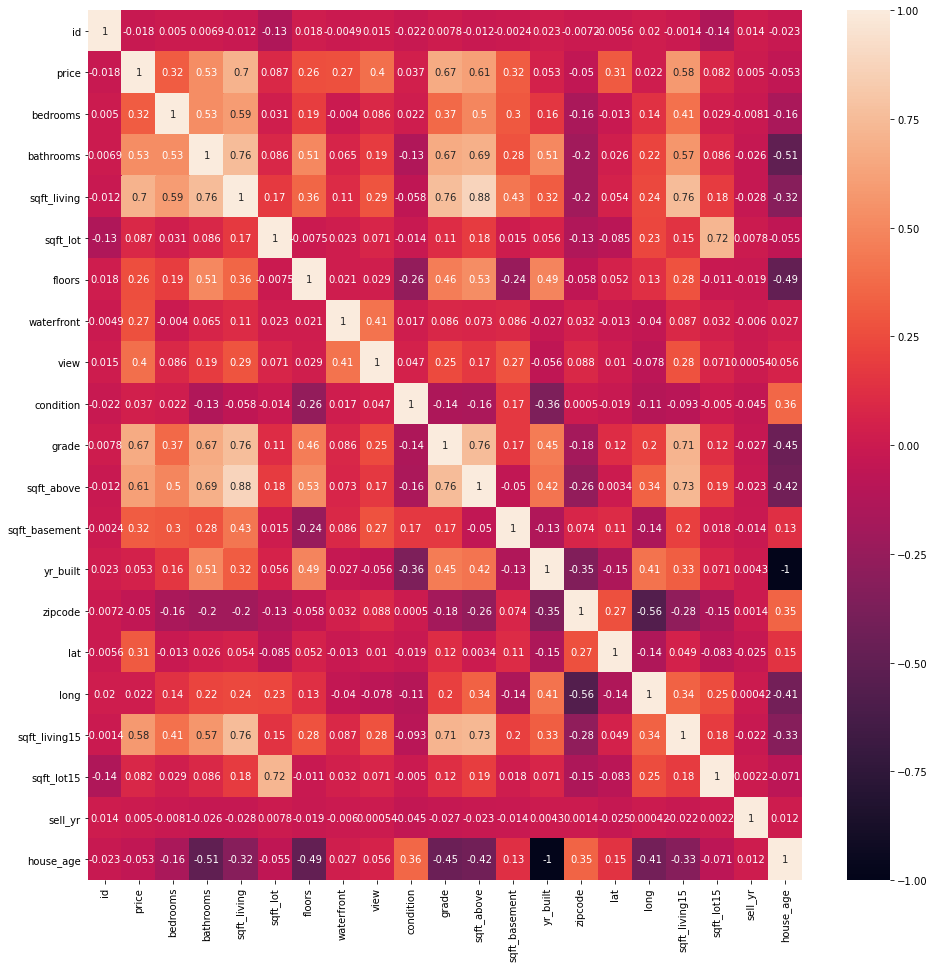

In [ ]:
fig, ax = plt.subplots(figsize=(16, 16))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);

#### Building The Model

In [ ]:
# defind our X and y
X = df.drop(['price', 'zipcode', 'id'], axis =1)
X = pd.get_dummies(X, columns = ['condition', 'view', 'grade', 'waterfront'], drop_first =True)
y = df['price']

#build the model and fitting it
ML_model = sm.OLS(y, sm.add_constant(X)).fit()

#print out summary
ML_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     1602.
Date:                Tue, 30 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:49:35   Log-Likelihood:            -2.6045e+05
No. Observations:               19163   AIC:                         5.210e+05
Df Residuals:                   19130   BIC:                         5.212e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -9.189e+07   6.27e+06    -14.661      0.000   -1.04e+08   -7.96e+07
bedrooms      -2.293e+04   2071.973    -11.064      0.000    -2.7e+04   -1.89e+04
bathrooms      4.832e+04   3338.832     14.471      0.000    4.18e+04    5.49e+04
sqft_living     108.6764     18.131      5.994      0.000      73.139     144.214
sqft_lot          0.1089      0.050      2.177      0.030       0.011       0.207
floors         2.182e+04   3725.077      5.859      0.000    1.45e+04    2.91e+04
sqft_above       30.7456     18.148      1.694      0.090      -4.826      66.317
sqft_basement    24.8693     17.960      1.385      0.166     -10.335      60.073
yr_built       8000.0192   1000.978      7.992      0.000    6038.015    9962.023
lat            5.711e+05   1.07e+04     53.321      0.000     5.5e+05    5.92e+05
long           -9.72e+04   1.22e+04     -7.969      0.000   -1.21e+05   -7.33e+04
sqft_living15    28.3480      3.545      7.997      0.000      21.400      35.297
sqft_lot15       -0.4008      0.074     -5.380      0.000      -0.547      -0.255
sell_yr        1.823e+04   2000.414      9.113      0.000    1.43e+04    2.22e+04
house_age      1.023e+04   1000.707     10.222      0.000    8267.772    1.22e+04
condition_2    4.067e+04   4.19e+04      0.969      0.332   -4.16e+04    1.23e+05
condition_3    5.171e+04   3.91e+04      1.322      0.186    -2.5e+04    1.28e+05
condition_4    8.659e+04   3.91e+04      2.213      0.027    9888.671    1.63e+05
condition_5    1.283e+05   3.94e+04      3.261      0.001    5.12e+04    2.05e+05
view_1         1.141e+05   1.16e+04      9.828      0.000    9.13e+04    1.37e+05
view_2         6.201e+04   7077.455      8.761      0.000    4.81e+04    7.59e+04
view_3         1.264e+05   9801.733     12.892      0.000    1.07e+05    1.46e+05
view_4         2.319e+05   1.47e+04     15.782      0.000    2.03e+05    2.61e+05
grade_4       -1.402e+05   1.97e+05     -0.710      0.478   -5.27e+05    2.47e+05
grade_5        -1.58e+05   1.94e+05     -0.814      0.416   -5.38e+05    2.22e+05
grade_6       -1.366e+05   1.94e+05     -0.705      0.481   -5.16e+05    2.43e+05
grade_7       -8.895e+04   1.94e+05     -0.459      0.646   -4.69e+05    2.91e+05
grade_8       -2.654e+04   1.94e+05     -0.137      0.891   -4.06e+05    3.53e+05
grade_9        9.366e+04   1.94e+05      0.483      0.629   -2.86e+05    4.74e+05
grade_10       2.563e+05   1.94e+05      1.321      0.186   -1.24e+05    6.37e+05
grade_11        4.82e+05   1.94e+05      2.481      0.013    1.01e+05    8.63e+05
grade_12       9.581e+05   1.95e+05      4.903      0.000    5.75e+05    1.34e+06
grade_13       2.134e+06   2.02e+05     10.569      0.000    1.74e+06    2.53e+06
waterfront_1   5.579e+05   2.02e+04     27.592      0.000    5.18e+05    5.98e+05
=================================================

### Interpreting the Results


<li> OUr P_value for f_statistics is significant since it is   below the standard alpha(0.05)
<li> The adjusted r_squared is about 73%. this shows that our model explains 73% of variance in price
<li> Assuming all of the independent variable is 0, a house  will cost -9.189e+07usd
<li> if the number of bathrooms increases by 1, the price of the house increases by 4.832e+04usd
<li> We can also say that we are 95% confident that our intercept lies between 4.832e+04 and -7.96e+07
<li> Our t_statistic is significant as well since it is below alpa (0.05)



#### Checking for Assumptions

##### Normality

In [ ]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sell_yr', 'house_age', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'view_1', 'view_2',
       'view_3', 'view_4', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13',
       'waterfront_1'],
      dtype='object')

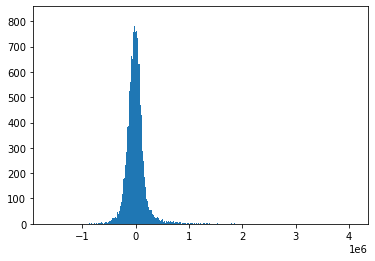

In [ ]:
# checking for normality in the residual
plt.hist(ML_model.resid, bins='auto')
plt.show()

From the diagram above we can see that the errors are not normaly distributed and therefore we will check the other assumptions to evaluate

#### Plotting the Model

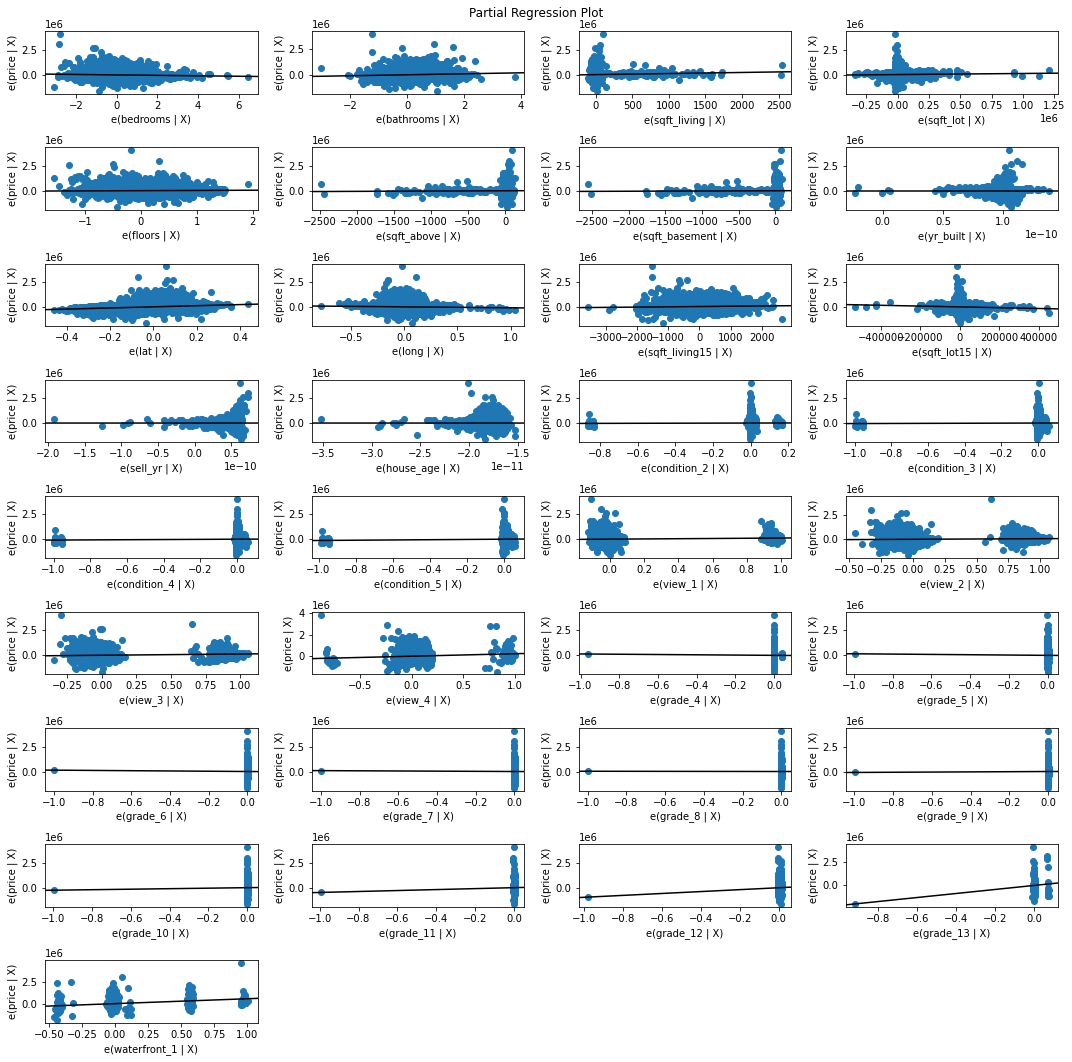

In [ ]:
fig = plt.figure(figsize=(15,15))
sm.graphics.plot_partregress_grid(
    ML_model,
    exog_idx=list(X.columns),
    grid=(9,4),
    fig=fig)
plt.tight_layout()
plt.show()

from this we can tell that most of the data obeys linearity assumption

#### 3. Independence of Errors

We are going  to find out the predicted y of the model and calculate the residual from there on

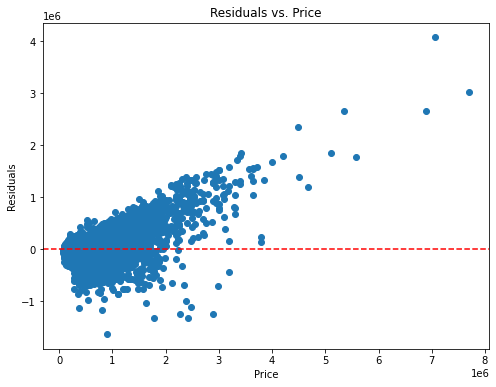

In [ ]:
# Plot residuals vs. target variable (price)
plt.figure(figsize=(8, 6))
plt.scatter(y, ML_model.resid)
plt.xlabel('Price')
plt.ylabel('Residuals')
plt.title('Residuals vs. Price')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

This is to show where our model works best

### Evaluating The Model

Adjusted r_squared is not enough to evaluate our model and therefore we need to see MAE and RMSE as well

In [ ]:
# Assuming X has shape (19163, 33)
X = np.hstack((X, np.zeros((X.shape[0], 1))))  # Adding a column of zeros as the additional feature

y_pred = ML_model.predict(X)

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
rmse = mse ** 0.5
print(mse)
print(rmse)

1.9281434833350915e+17
439106306.4150971


From this we can see that due to Outliers,Nonlinear Relationships,Heteroscedasticity and overfitting our MSE and RMSE are high, we will build another model to remidy this factors.

### Model 3

In this model we will clean our data to remove outliers and remove non- linear data to build thus model. We will also train part of the data to evaluate the model on the remaining data

In [ ]:
def outliers(df):
    # Remove outliers in bedrooms
    df = df[~df['bedrooms'].isin([11, 10, 9])]
    # Fix floors column
    df['floors'] = df['floors'].apply(lambda x: np.ceil(x))
    # Remove outliers in long
    df = df[df['long'] < -121.647]
    # Remove outliers in price
    df = df[df['price'] < 4000000]
    # Remove outliers in sqft_basement
    df = df[df['sqft_basement'] < 3000]

outliers(df)

<ipython-input-467-8b0b995f2a02>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floors'] = df['floors'].apply(lambda x: np.ceil(x))


In [ ]:
df.corr()['price']

id              -0.018097
price            1.000000
bedrooms         0.317152
bathrooms        0.526620
sqft_living      0.704441
sqft_lot         0.087433
floors           0.258815
waterfront       0.270984
view             0.395772
condition        0.037486
grade            0.667733
sqft_above       0.609638
sqft_basement    0.318834
yr_built         0.053446
zipcode         -0.050198
lat              0.306367
long             0.021726
sqft_living15    0.582478
sqft_lot15       0.081567
sell_yr          0.004998
house_age       -0.053363
Name: price, dtype: float64

In [ ]:
#choosing the mostly related data to out y variable
X = df[['bathrooms','sqft_living','grade', 'sqft_above','sqft_living15']]
X = pd.get_dummies(X, columns=['grade'], drop_first=True)
y = df['price']
# spliting data to  prevent overfitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state= 66)

#### Building The Model

In [ ]:
#fitting the model
model_3 = sm.OLS(y, X).fit()

#model resultsd
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.870
Method:                 Least Squares   F-statistic:                              9176.
Date:                Wed, 01 May 2024   Prob (F-statistic):                        0.00
Time:                        00:04:44   Log-Likelihood:                     -2.6430e+05
No. Observations:               19163   AIC:                                  5.286e+05
Df Residuals:                   19149   BIC:                                  5.287e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms     -8778.8399   3573.859     -2.456      0.014   -1.58e+04   -1773.763
sqft_living     217.8327      4.636     46.992      0.000     208.747     226.919
sqft_above      -95.4270      4.561    -20.924      0.000    -104.366     -86.488
sqft_living15    20.1783      4.121      4.896      0.000      12.100      28.256
grade_4        1.056e+05   4.77e+04      2.215      0.027    1.22e+04    1.99e+05
grade_5        1.083e+05   1.72e+04      6.289      0.000    7.45e+04    1.42e+05
grade_6        1.275e+05   8058.966     15.818      0.000    1.12e+05    1.43e+05
grade_7        1.513e+05   8014.364     18.882      0.000    1.36e+05    1.67e+05
grade_8        2.231e+05      1e+04     22.209      0.000    2.03e+05    2.43e+05
grade_9        3.675e+05   1.27e+04     28.927      0.000    3.43e+05    3.92e+05
grade_10       5.743e+05   1.55e+04     36.939      0.000    5.44e+05    6.05e+05
grade_11       8.569e+05   2.05e+04     41.803      0.000    8.17e+05    8.97e+05
grade_12       1.415e+06   3.24e+04     43.663      0.000    1.35e+06    1.48e+06
grade_13       2.623e+06   6.97e+04     37.642      0.000    2.49e+06    2.76e+06
==============================================================================
Omnibus:                    12620.045   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           488625.807
Skew:                           2.633   Prob(JB):                         0.00
Kurtosis:                      27.171   Cond. No.                     1.51e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interpreting the results

1. Our Adj_rsquared is about  87% that means the model explains 87% of variation in price
2. Our model is statistically significant since the p-value for F-statistic is way below alpa 5%
3. from the slope coeffients above we can see that a change in 1 unit of the  sqft_living results in an increase of about 217 in price. this also applies to ther independent variables
4. For the dummy variable an increase of 1 grade_4 causes an increase of about 1.056e+05 in grade 3
5. Jarque-Bera (JB): Another test for normality of residuals. A low p-value (< 0.05) indicates that the residuals are not normally distributed

### Evaluating Model_3

In [ ]:
y_pred = model_3.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(rmse)
print(mae)

230179.555569266
154524.6121537352


From the calculated MAE and RMSE we can tell that the third model is way accurate compared to the previous 2 models and we recomend using 3rd model in predicting the price of a house.

### RECOMENDATIONS

From the 3 modules built we advise potential buyers or sellers to concider model 3 in determining the price of a house. We can also suggest that the factor affecting the price of a house most is  square foot living but they should concider increasing the number of bathrooms during renovations for the case of the sellers. 

#### Next Steps
1.Find more features that home buyers often value highly to add to the model<br>
2.Correlate the information of this model with ones for other states<br>